In [1]:
#!pip install wikitables
#!pip install pandas

In [ ]:
import pandas as pd
from wikitables import import_tables

In [2]:
tables = import_tables('Real Madrid CF') #returns a list of WikiTable objects

Real Madrid CF[1][0]: missing field for column [Contractannouncement]
Real Madrid CF[1][0]: missing field for column [Contractduration]
Real Madrid CF[1][0]: missing field for column [Value]
Real Madrid CF[1][0]: missing field for column [Notes]


In [6]:
decades = [1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]

In [3]:
#Turn the row of wikipidia into pd Series.
Rm_trophis = []
for row in tables[2].rows:
    season = str(row.get("Seasons"))
    season = season.split()
    for i in season:
        if i != ",":
            i.replace(",","")
            Rm_trophis.append(i[:4])
Rm_trophis_year = pd.Series(Rm_trophis)

In [158]:
# funcation that turns years into  a list of decadeds.
Rm_trophis_year = Rm_trophis_year.apply(lambda x: str(x)[:3]+'0')
list1 = Rm_trophis_year.astype(int).to_list()

In [150]:
#lists-
La_liga = list1[0:34]
Copa = list1[35:53]
Super_copa = list1[54:64]
Copa_Eva_Duarte = list1[64:65]
Copa_de_la_liga = list1[:65:66]
UCL = list1[66:79]
Uefa_cup = list1[79:81]
Uefa_super_cup = list1 [81:85]
Inter_cup = list1 [85:88]
Fifa_wrld_cup = list1[88:]

In [151]:
# A dict of all Real madrid Trophis
RM_TROPHIS = {"La Liga":La_liga,"Super Copa":Super_copa,"Copa del rey":Copa,"Copa_Eva_Duarte":Copa_Eva_Duarte,"Copa_de_la_liga":Copa_de_la_liga,
"UCL":UCL,"Uefa_cup":Uefa_cup,"Uefa_super_cup":Uefa_super_cup,"Inter_cup":Inter_cup,"Fifa_wrld_cup":Fifa_wrld_cup}
#functiont that count number of tropgis of each decade
def sep_dec(dic,deca):
    dict1 ={}
    for key, values in dic.items():
        count = 0
        for value in values:
            if value == deca:
                count+=1
                dict1[key]=count
    return pd.Series(dict1)

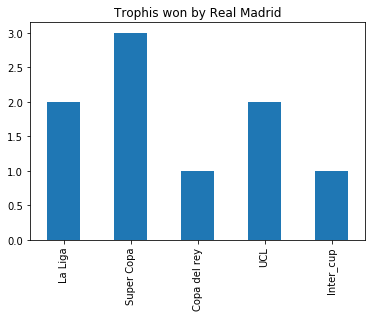

In [154]:
#Insert the decade and get the bar table of trophis.
show_plot = sep_dec(RM_TROPHIS,1990).plot(kind= "bar",title = "Trophis won by Real Madrid acoording to the decade")
show_plot